In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
x = df.drop(['Surname', 'Geography', 'RowNumber', 'Gender', 'Exited'], axis=1)
y=df['Exited']

<Axes: xlabel='Exited', ylabel='count'>

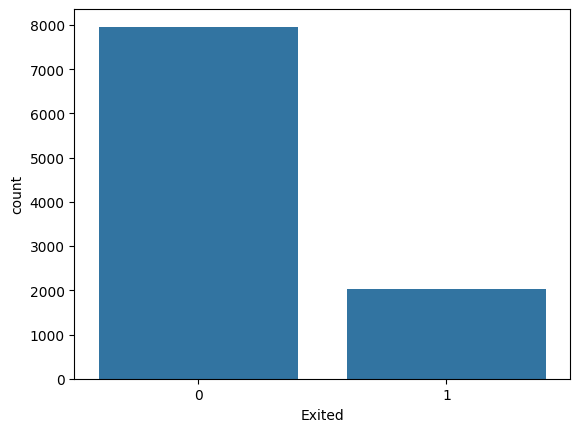

In [4]:
sns.countplot(x=y)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [6]:
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-0.78321342, -0.32622142,  0.29351742, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.60653412, -0.44003595,  0.19816383, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-0.99588476, -1.53679418,  0.29351742, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [-1.47928179,  0.60498839, -0.27860412, ..., -1.54776799,
         0.97024255, -1.00864308],
       [-0.11935577,  1.25683526,  0.29351742, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [-0.87055909,  1.46377078, -1.04143285, ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, random_state=2, test_size=0.25)

In [8]:
#pip install -U scikit-learn

In [9]:
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(hidden_layer_sizes=(100, 100, 100), random_state=2, max_iter=100, activation='relu')

In [10]:
ann.fit(x_train, y_train)

D:\Python\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100, random_state=2)

In [11]:
y_pred = ann.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [13]:
accuracy_score(y_test, y_pred)

0.802

In [14]:
confusion_matrix(y_test, y_pred)

array([[1791,  224],
       [ 271,  214]], dtype=int64)

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      2015
           1       0.49      0.44      0.46       485

    accuracy                           0.80      2500
   macro avg       0.68      0.67      0.67      2500
weighted avg       0.79      0.80      0.80      2500

